# 1. Быстрее ли numpy?

Говорилось, что вычисления с использованием библиотеки numpy выполняются с большей скоростью. Для проверки посчитаем скалярное произведение двух векторов с использованием numpy и без.

In [3]:
import numpy as np

Нам понадобится библиотека time для временных замеров:

In [4]:
import time

In [ ]:
A = np.random.normal(size = (100000,))
B = np.random.normal(size = (100000,))
A_list, B_list = list(A), list(B)

type(A), type(A_list)

Посчитаем скорость работы в одном случае:

In [ ]:
start = time.clock()
res = 0.
###################################################
# Место для скалярного умножения A_list и B_list, #
#                   вычисленного с помощью цикла. #
###################################################
print(('Программе потребовалось %.4f секунды '
       'для вычисления скалярного умножения '
       'стандартными средствами python') % (time.clock() - start)) # время выполнения в секундах

И во втором:

In [ ]:
start = time.clock()
###################################################
# Место для скалярного умножения A_list и B_list, #
#            вычисленного с помощью методов numpy #
###################################################
print(('Программе потребовалось %.4f секунды '
       'для вычисления скалярного умножения '
       'с помощью методов numpy') % (time.clock() - start))

# 2. Линейная регрессия: подсчет функционалов качества

Рассмотрим модельную задачу линейной регрессии: имеется выборка из $N = 100$ объектов, каждый из них обладает $d = 2$ действительным признаками и значением наблюдаемой величины. Признаки объектов образуют матрицу $X$ (размера $N \times d$, $N$ строчек и $d$ столбцов), наблюдаемые величины матрицу $Y$

Решая задачу линейной регрессии, мы будем искать зависимость между $X$ и $Y$ в форме $y_i = f(x_i) = a x_{i1} + b x_{i2} + c$. 

Ниже случайным образом сгенерированы данные.

In [5]:
N = 100
N_test = 20
d = 2
# x_1 умножаем на 3, x_2 умножаем на 5, добавляем 8, а потом добавляем шум
X = 1 + 2 * np.random.randn(N, d)
Y = np.sum(X * np.array([3, 5]), axis = 1) + 8 + 1.2 * np.random.randn(N)

X_test = 1 + 2 * np.random.randn(N_test, d)
Y_test = np.sum(X_test * np.array([3, 5]), axis = 1) + 8 + 1.2 * np.random.randn(N_test)

Сейчас мы для решения задачи воспользуемся стандартной функцией библиотеки sklearn. Она выдает лишь два значения, коэффициенты $a$ и $b$. Коэффициент $c$ можно по ним и по данным.

In [6]:
from sklearn import linear_model

regr = linear_model.LinearRegression()
regr.fit(X, Y)
# a, b:
a, b = regr.coef_
# c:
c = np.mean(Y - np.dot(X, regr.coef_))
(a, b, c)

(3.0457161199284197, 4.9680843056258404, 8.1650400288280736)

Изображаем её:

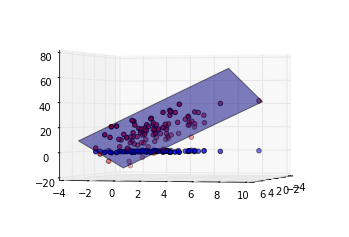

In [7]:
%matplotlib inline
#%matplotlib notebook
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

range_x = np.linspace(np.min(X[:, 0]), np.max(X[:, 0]), 10)
range_y = np.linspace(np.min(X[:, 1]), np.max(X[:, 1]), 10)
xx, yy = np.meshgrid(range_x, range_y)

ax.view_init(elev=0., azim=15)
ax.plot_surface(xx, yy, a * xx + b * yy + c, alpha = 0.5)
ax.scatter(X[:, 0], X[:, 1], c = 'b')
ax.scatter(X[:, 0], X[:, 1], Y, c = 'r');

У нас есть значений $Y$, посчитаем предсказания модели f(X): 

При сравнении предсказаний и истинных значений на помощь нам может придти линейная алгебра. Оба этих массива представляют точки в линейном пространстве, посчитаем расстояние в между ними!

Вообще говоря, расстояния (метрики) в математике огромным количеством способов, каждый из этих способов может задавать нам критерий качества работы модели. Приведем несколько примеров:

1. Евклидова метрика, квадратичная

    $ \rho_2(x, y) = \sqrt{\sum_{i = 1}^{N} (x_i - y_i)^2} $

2. $L_1$, манхэттенская

    $ \rho_1(x, y) = \sum_{i = 1}^N |x_i - y_i| $

3. $L_\infty$

    $ \rho_{\infty} = \max_i |x_i - y_i|$

Все они объединяются одной формулой:
$\rho_p(x, y) = (\sum_{i=1}^n |x_i - y_i|^p)^{1/p}$

Вычислить значение функционала качества, определяемого расстоянием $\rho_2$:

Проверка:

In [ ]:
np.linalg.norm(loss, 1)

Вычислить значение функционала качества, определяемого расстоянием $\rho_1$:

Проверка:

In [ ]:
np.linalg.norm(loss, 1)

Вычислить значение функционала качества, определяемого расстоянием $\rho_{\infty}$:

Провекра:

In [ ]:
np.linalg.norm(loss, np.inf)

# 3. Преобразования данных

Алгоритмы машинного обучаения бывают чувствительны к значениям входных данных, чтобы избежать возможных проблем данные нормализуют.

Первым делом преобразуем X так, чтобы среднее значение каждого признака было равно нулю:

А теперь изменим масштаб так, чтобы каждый признак лежал в отрезке $[-1, 1]$. Домножим каждый признак для этого на подходящее число:

# 4. Линейная регрессия своими руками

Коэффициенты линейной регрессии выражаются по формуле $(X^T X)^{-1}  X^T y$. Вычислить её своими руками почти также просто как воспользоваться библиотечной функцией, заодно мы поупражняемся в матричных операциях.

Вычислять выражение будем слева направо. Вычислять произведения матриц можно несколькими способами, воспользуемся методов *numpy.dot* для вычисления $X^T X$. В numpy X.T возвращает транспонированную матрицу X.

In [ ]:
step_1 = 

Обратную матрицу можно посчитать с помощью библиотечной функции:

In [ ]:
step_2 = np.linalg.inv(step_1)

Второе произведение посчитаем также:

In [ ]:
step_3 = 

А домножение на произведем с помощью покомпонентного умножения и метода np.sum:

In [ ]:
step_4 = 

# 5. Посчитаем производную

Не всегда удается выписать явную формулу, по которой можно вычислить параметры. Да и явные формулы не всегда уместны. В таких случаях можно искать минимальные значения функционала потерь, обсудим как можно искать минимумы с помощью компьютера.

## 5.1 Пример с многочленами

Воспользуемся библиотечной функцией, которая считает значения многочлена. На вход она принимает массив аргументов и массив коэффициентов многочлена (от младшего к старшему)

In [ ]:
from numpy.polynomial.polynomial import polyval

f = np.array([-2, -8, -5, 10, 1, -2])

fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
xx = np.linspace(-2.1, 2.1, 500)
ax.set_xlim(-2.1, 2.1)
ax.plot(xx, polyval(xx, f));

Напишите значение аналогичной функции, вычисляющей значения производной многочлена:

In [ ]:
def derivative(x, f):
    #########################
    # Место для производной #
    #########################

Производная не только дает необходимые условия экстремума, но и позволяет приближать функцию! Положим $x_0 + \Delta = x$

$f(x_0 + \Delta x) \approx f(x_0) + f'(x_0) \Delta x$

Если взять достаточно малый $\Delta x$ того же знака, что и $-f'(x_0$), то 
$f'(x_0) \Delta x < 0$ и из первой формулы следует $f(x_0 + \Delta x) < \approx f(x_0) + f'(x_0) \Delta x$.

Поэтому можно ожидать, что в $f(x_0 + \Delta x) $ у функции будет меньшее значение!

На этом наблюдении основан метод градиентного спуска, итеративно из старой точки $x_{old}$ мы переходим в новую точку $x_{new} = x_{old} + \nu  f'(x_{old}) \Delta x$

Спуск:

In [ ]:
T = 20
x = np.zeros(T)
x[0] = 0
dx = 0.01
for t in np.arange(1, T, 1):
    ###########################
    # Шаг градиентного спуска #
    ###########################

Иллюстрация работы:

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
xx = np.linspace(-2.1, 2.1, 500)
ax.set_xlim(-2.1, 2.1)
ax.plot(xx, np.polynomial.polynomial.polyval(xx, f), color = (1, 0.5, 0.5))
#for i in len(tt)
ax.plot(x, np.polynomial.polynomial.polyval(x, f), 'o', color = (0.5, 0.5, 1))

## 5.2* Подбор параметром линейной регрессии

С помощью градиентного спуска можно также найти параметры линейной регрессии! Достаточно правильно вычислить производную квадратичной ошибки и найти её минимум относительно параметров. (В случае одномерного градиентного спуска мы брали $\Delta x$ того же знака, что и $f'$, теперь мы будем брать $\Delta x$ того же направления, что и $grad f$ )